In [10]:
#importing required Libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import shap

c:\Users\Minfy.CHIRANJIBISILLA\anaconda3\envs\evident\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [11]:
#loading dataset
df=pd.read_csv("Lead Scoring.csv")
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [12]:
#checking the null values
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

#### Note
       -The output shows that several columns have a significant number of missing values, such as Lead Quality, Asymmetrique Activity Index, Asymmetrique Profile Index, Asymmetrique Activity Score, Asymmetrique Profile Score, and Tags.

In [13]:
#checking for duplicated values
df[df.duplicated].sum()

Prospect ID                                        0
Lead Number                                        0
Lead Origin                                        0
Lead Source                                        0
Do Not Email                                       0
Do Not Call                                        0
Converted                                          0
TotalVisits                                      0.0
Total Time Spent on Website                        0
Page Views Per Visit                             0.0
Last Activity                                      0
Country                                            0
Specialization                                     0
How did you hear about X Education                 0
What is your current occupation                    0
What matters most to you in choosing a course      0
Search                                             0
Magazine                                           0
Newspaper Article                             

#### 
   The output indicates there are no duplicated rows in the dataset.

In [14]:
#checking for datatypes
df.dtypes

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                       

In [15]:
#gathering information about df
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

####
The output provides a concise summary of the DataFrame, including the number of entries, column details, and descriptive statistics for numerical columns.


In [16]:
#Droping prospectId and Leadnumber which is not useful any analysis.
df.drop(['Prospect ID', 'Lead Number'], axis=1,inplace=True)
df.head()


,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


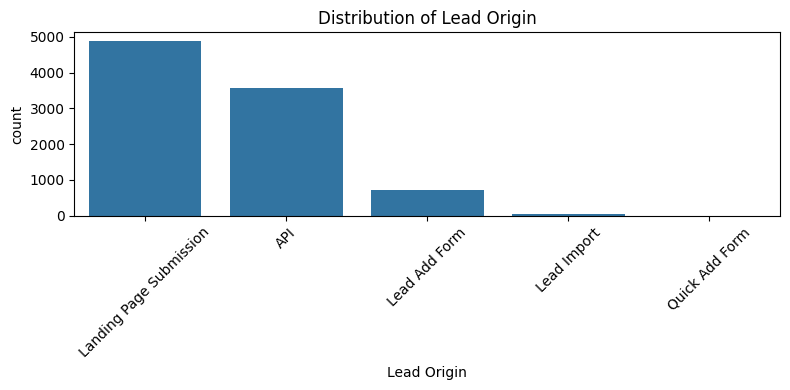

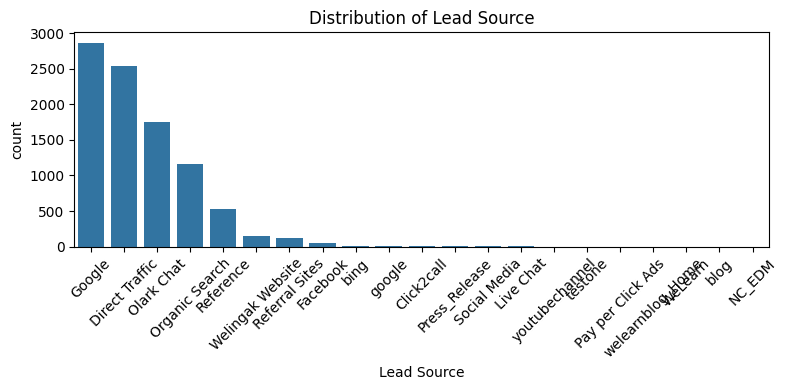

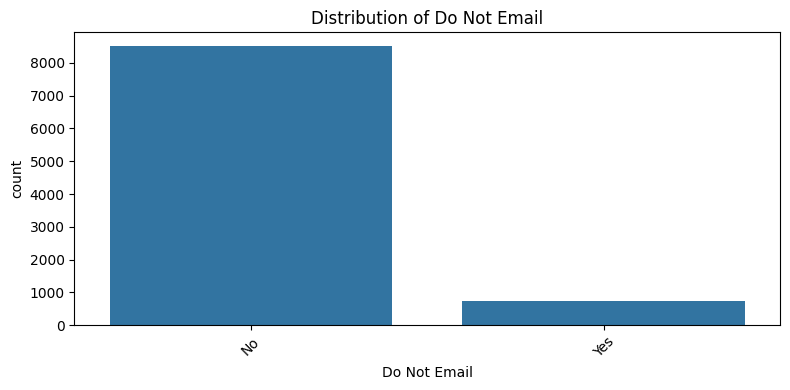

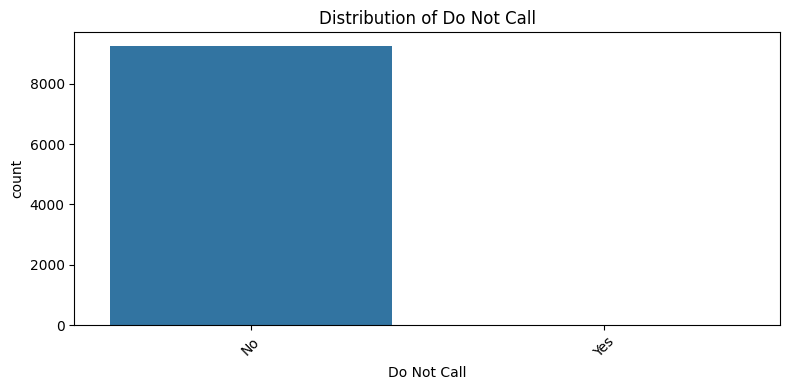

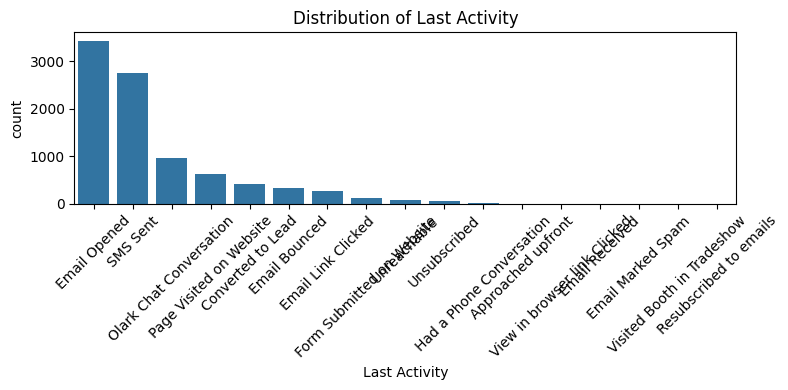

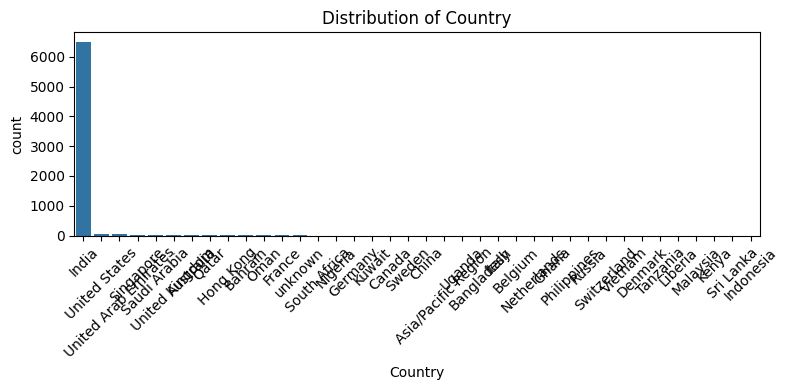

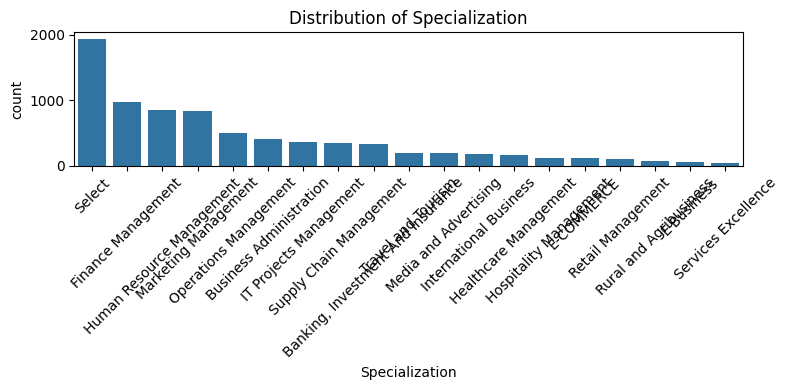

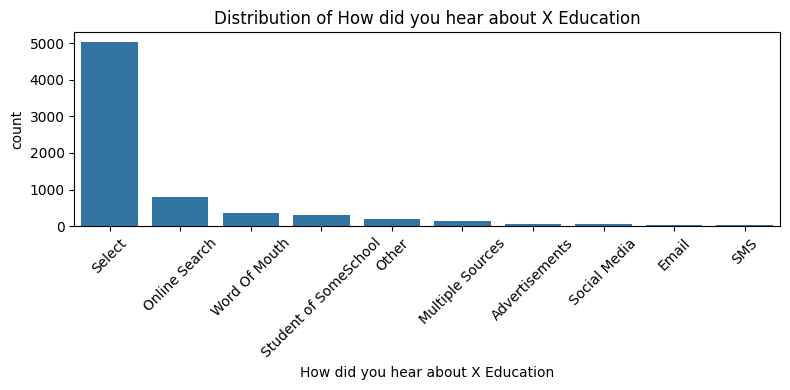

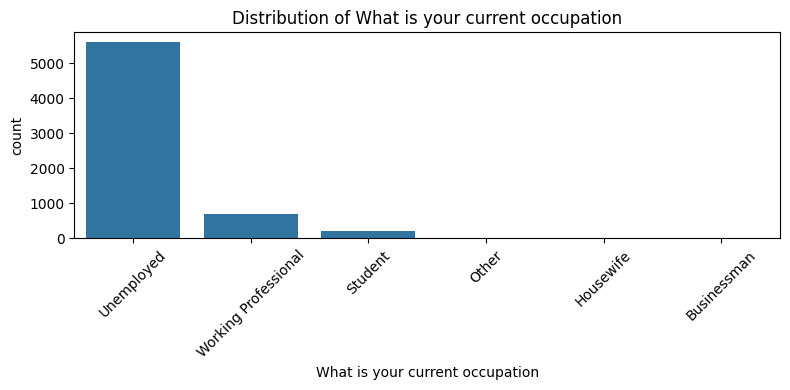

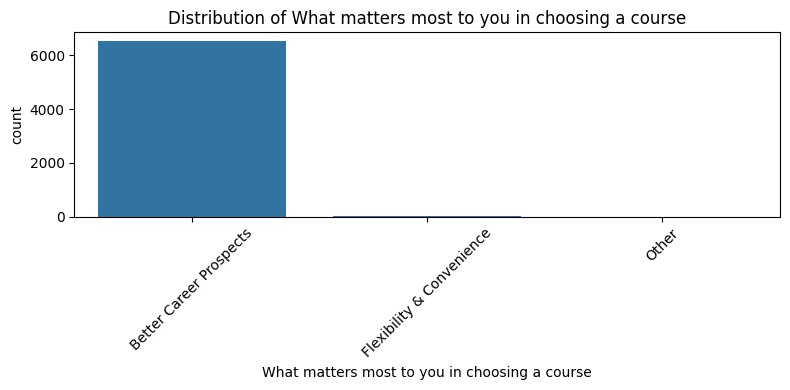

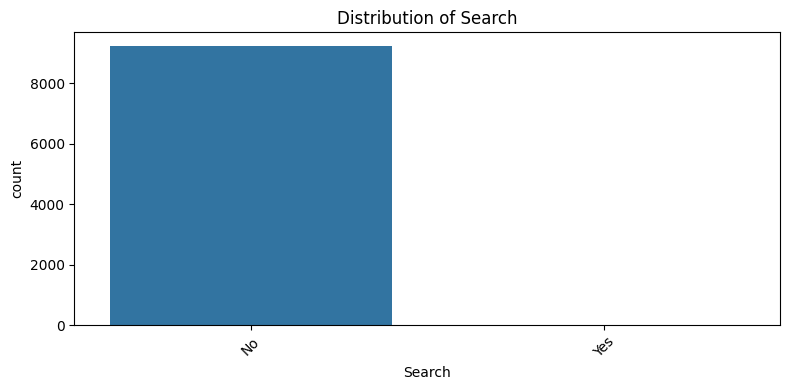

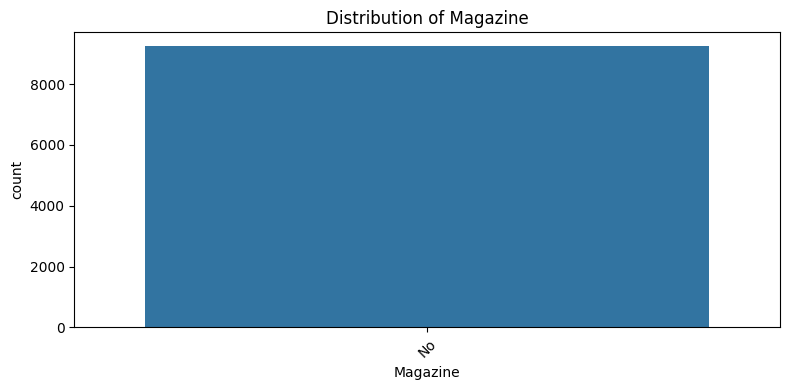

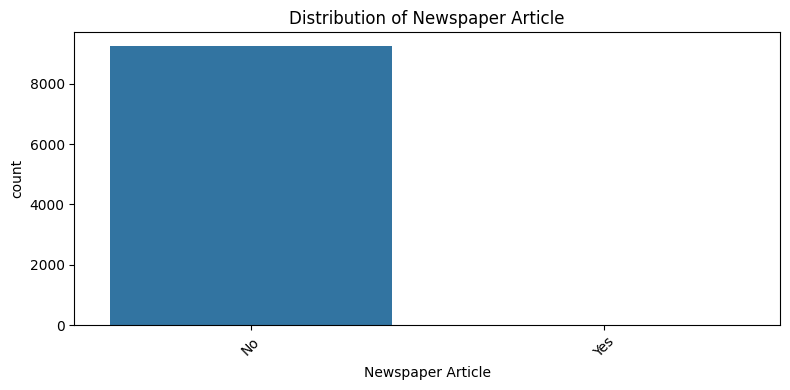

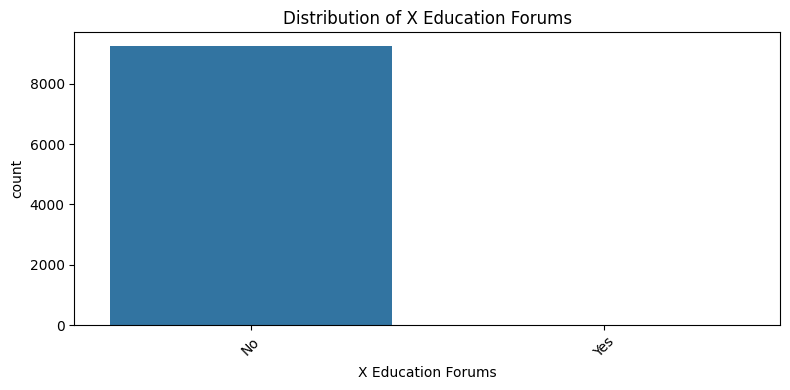

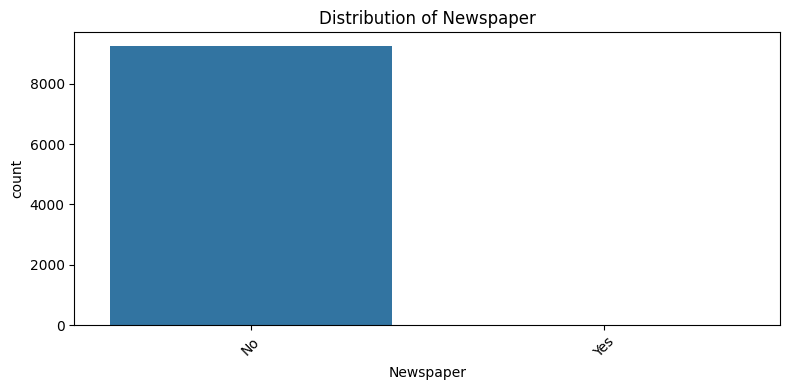

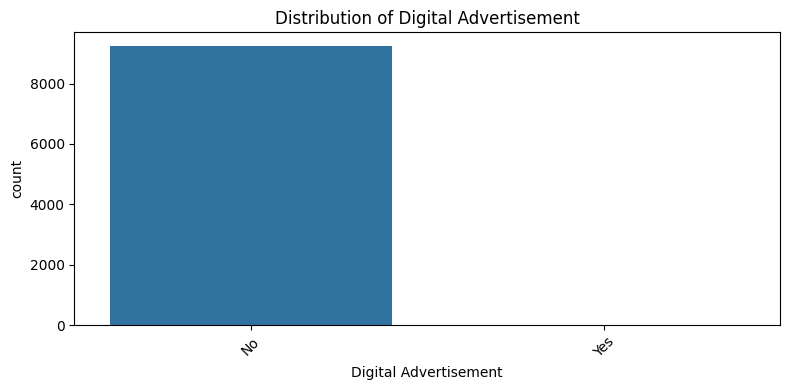

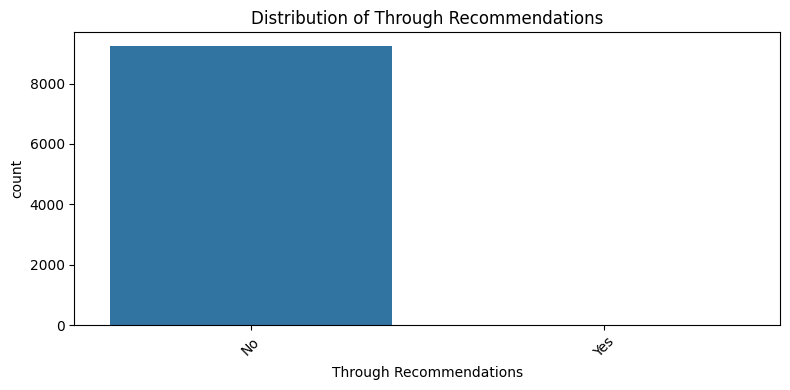

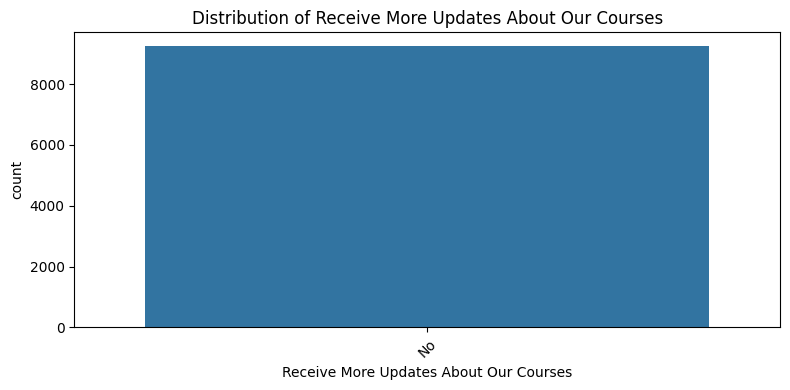

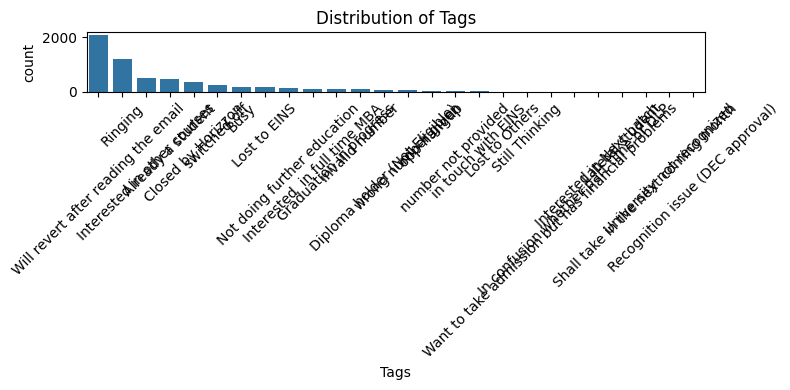

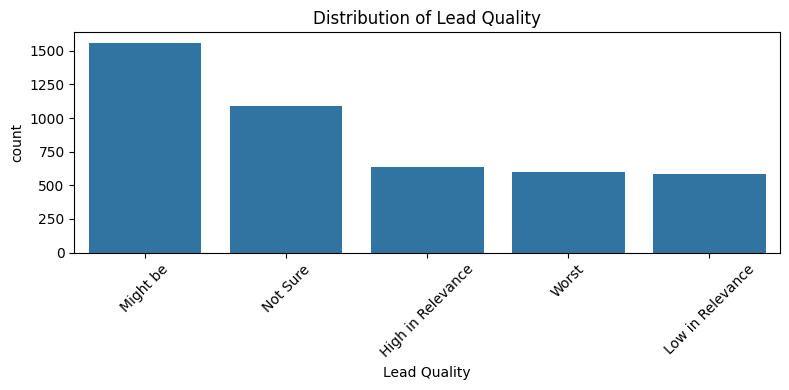

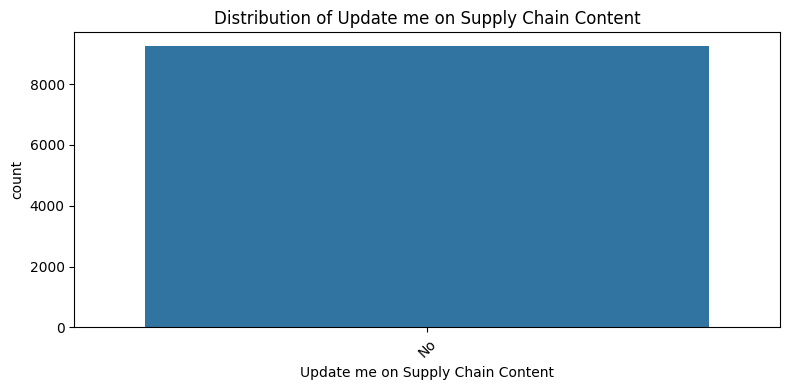

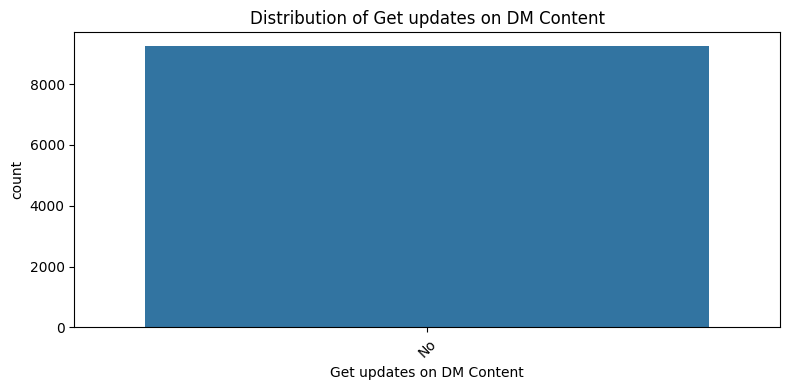

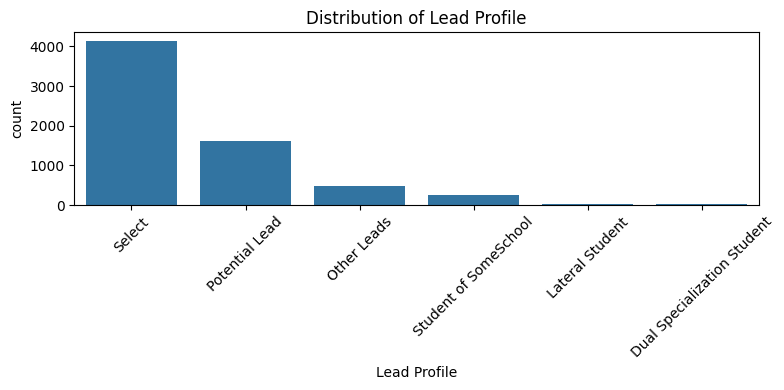

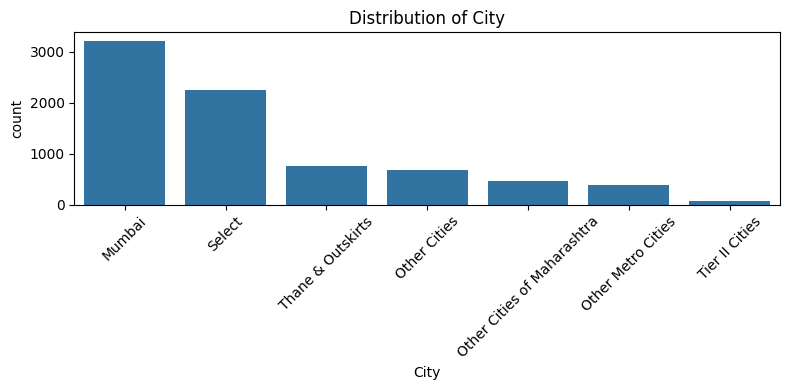

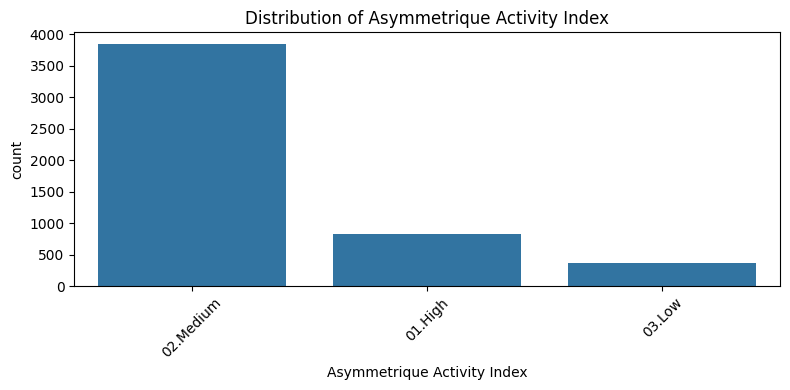

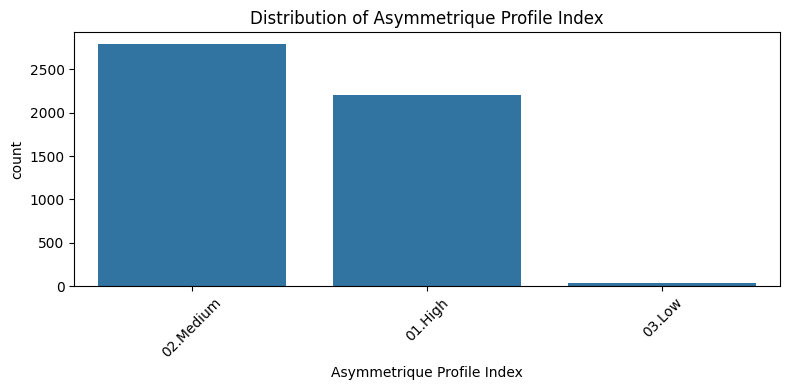

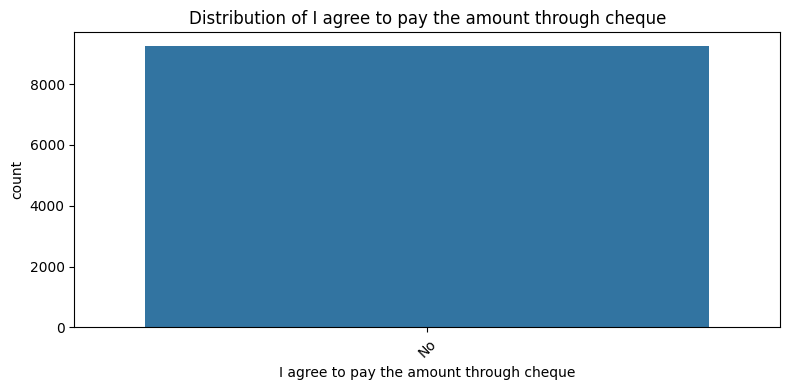

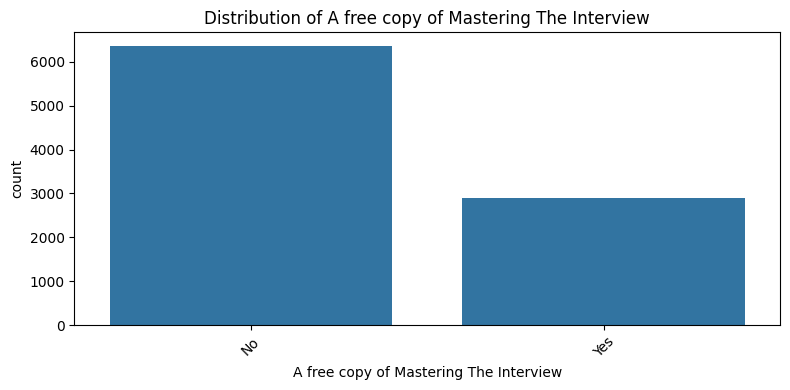

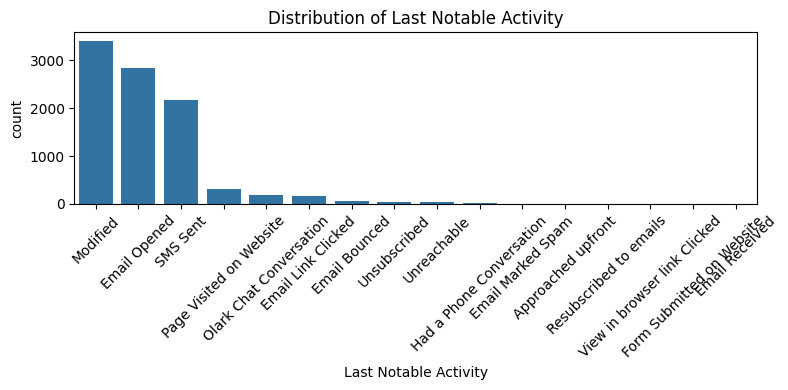

In [17]:
#Univariate analysis
# Categorical columns
categorical_cols = df.select_dtypes(include='object').columns

# Plot frequency distribution of categorical features
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

#### Note
       -Here After Observing Univariate Analysis of Categorical Columns There is no variation in Cetain Columns like 'Get updates on DM Content',
    'Receive More Updates About Our Courses',
    'I agree to pay the amount through cheque',
    'Magazine',
    'Update me on Supply Chain Content' So i decided to drop them

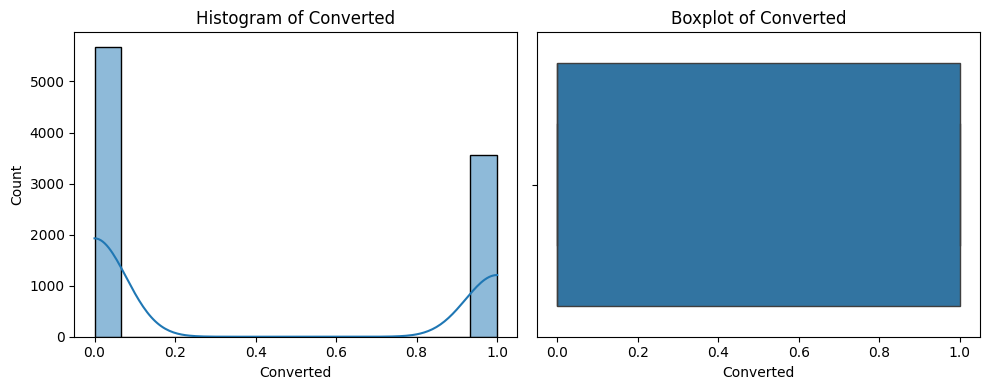

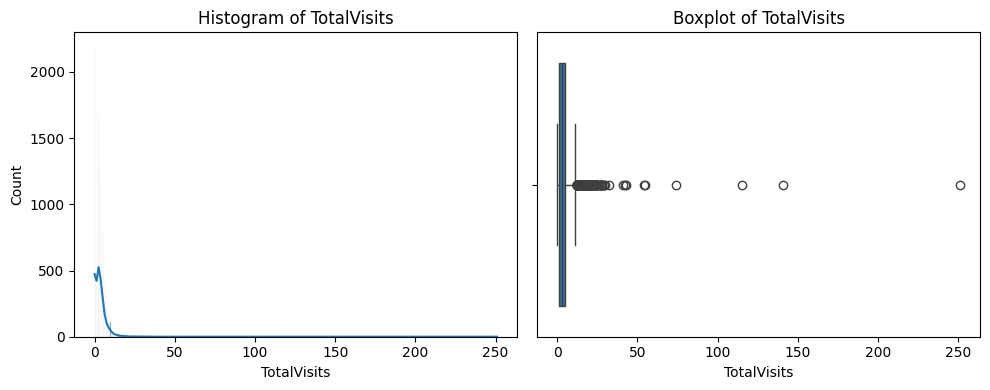

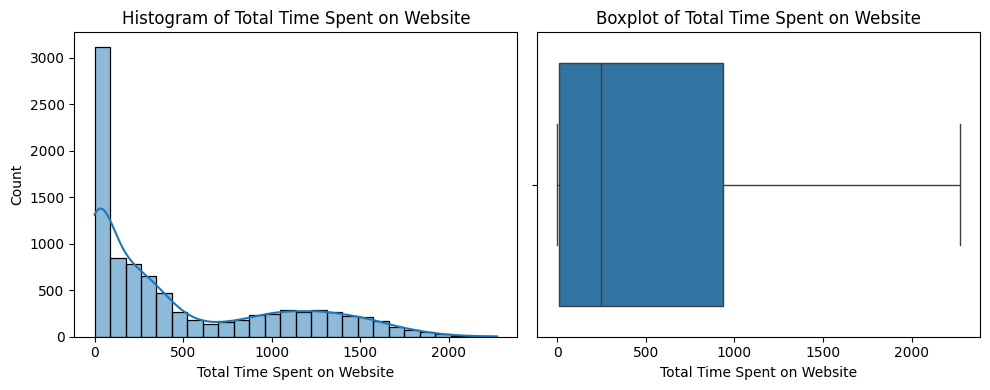

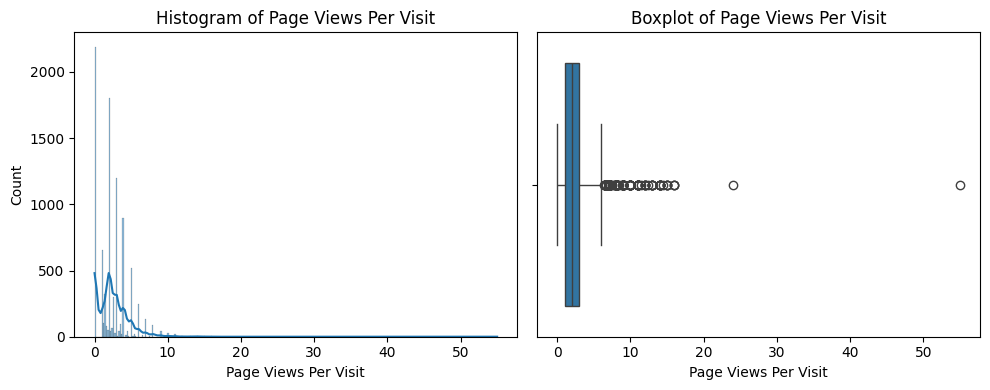

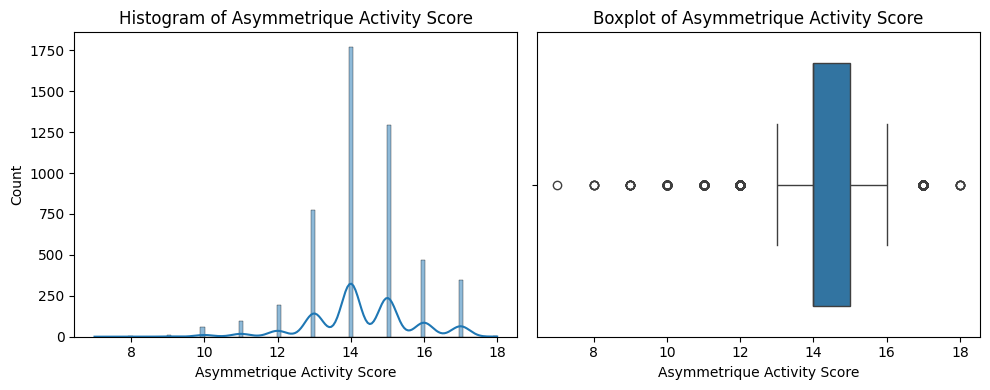

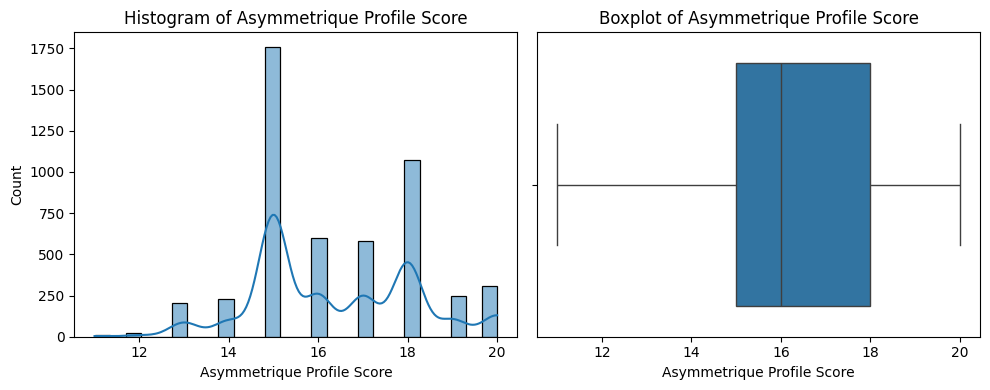

In [18]:
# Numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Plot histogram and boxplot for each numerical column
for col in numerical_cols:
    plt.figure(figsize=(10, 4))
    
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')
    
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    
    plt.tight_layout()
    plt.show()


In [19]:
skew_values = df.skew(numeric_only=True)

print(skew_values)

Converted                       0.471058
TotalVisits                    19.911657
Total Time Spent on Website     0.956450
Page Views Per Visit            2.871793
Asymmetrique Activity Score    -0.383380
Asymmetrique Profile Score      0.221739
dtype: float64


#### 

### Note
    -I have Observed Right-Skewness in TotalVisits  and Page Views Per Visit Do i have decided it to Transformation techniques  

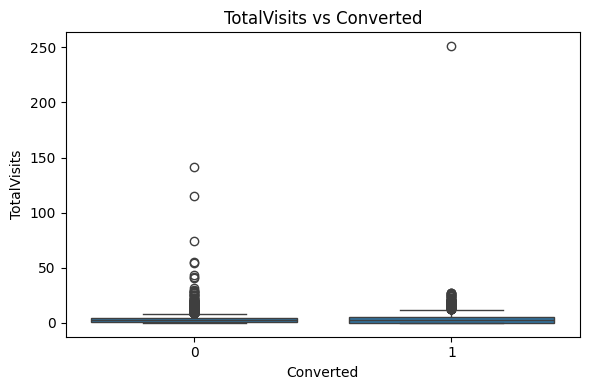

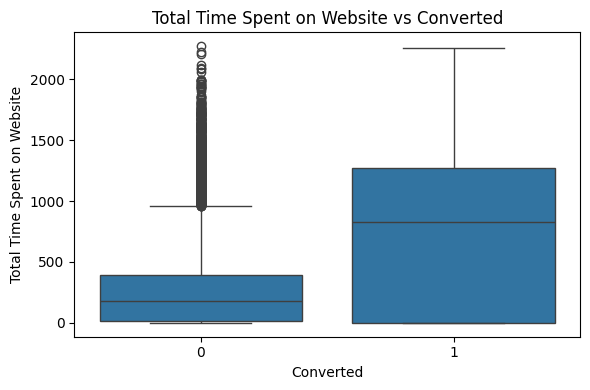

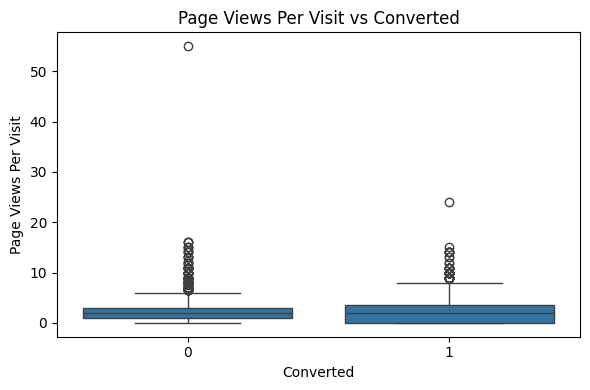

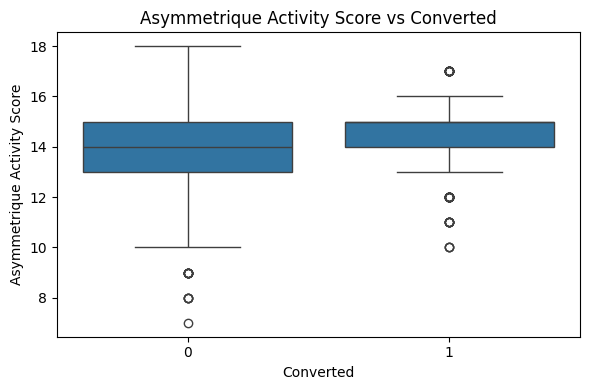

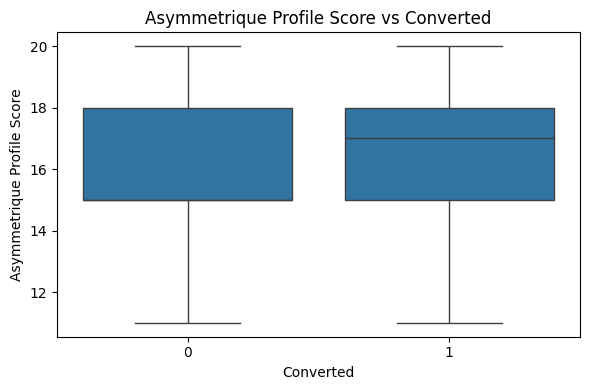

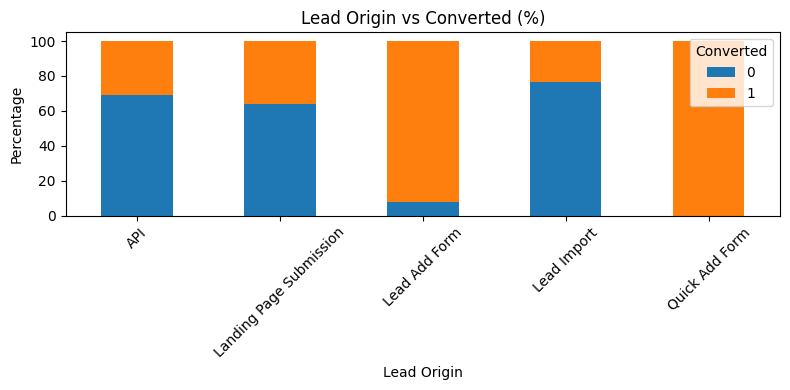

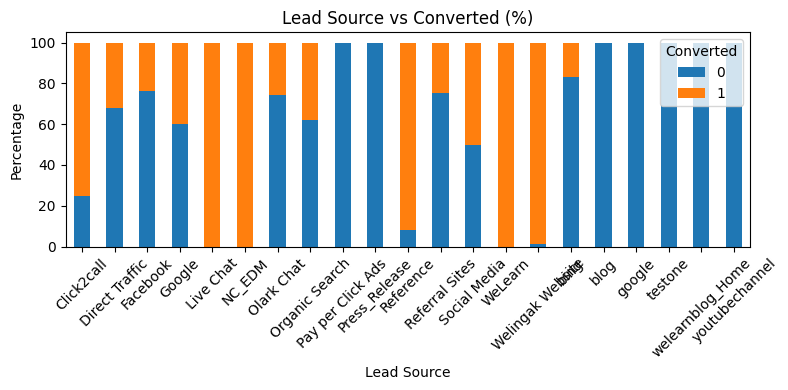

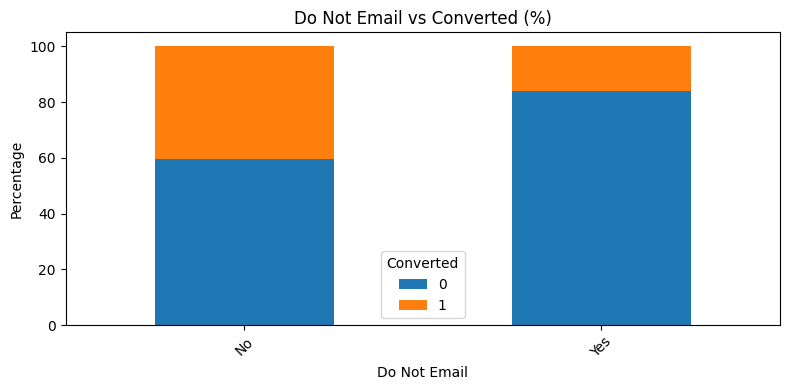

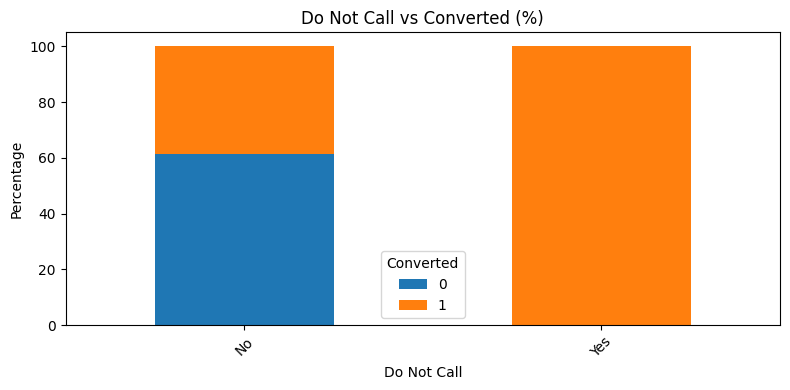

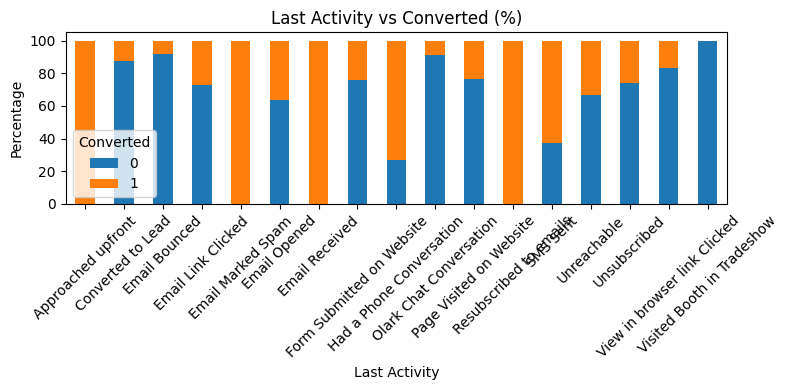

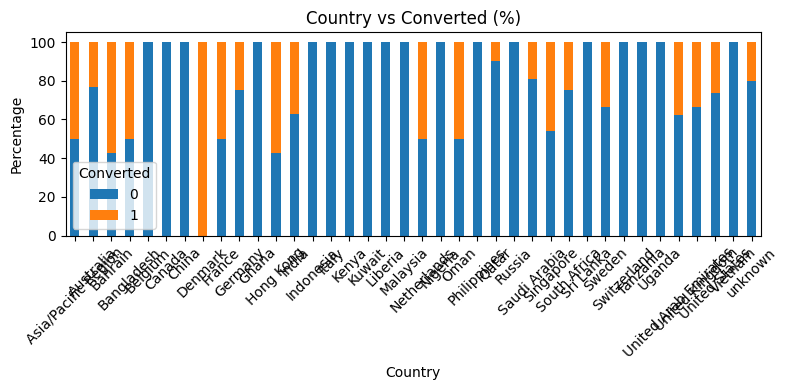

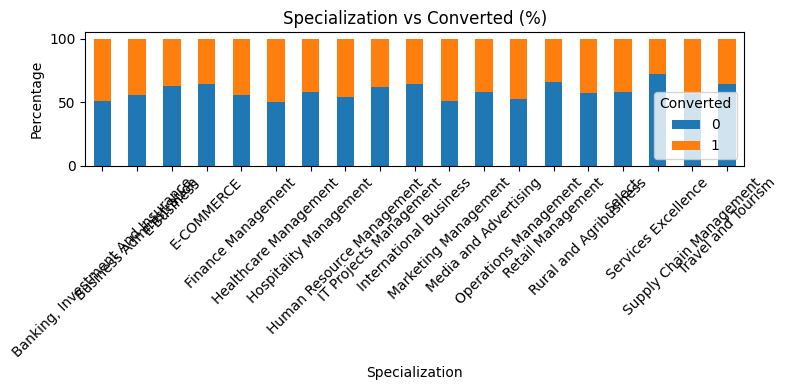

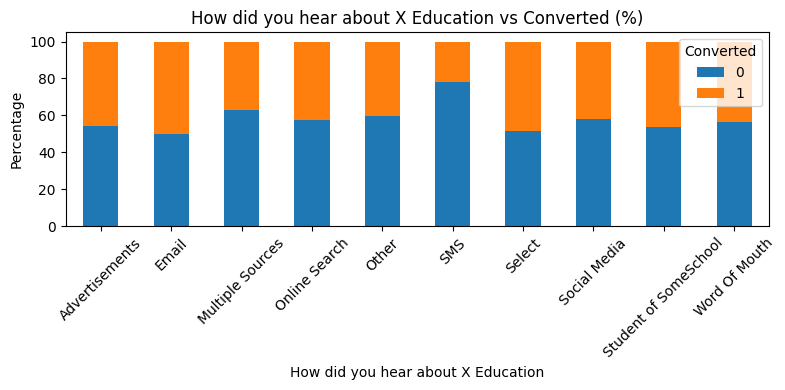

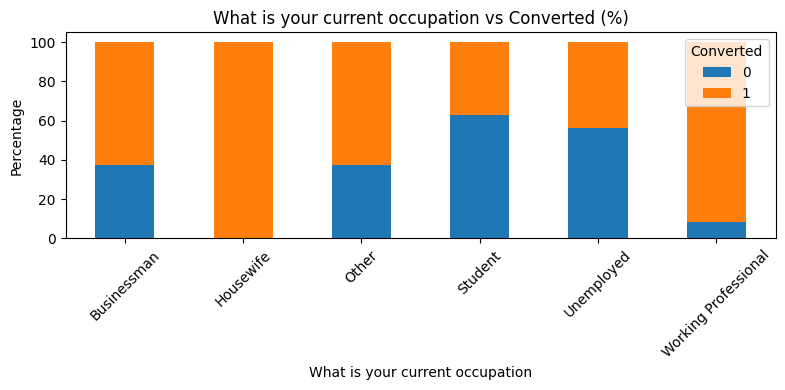

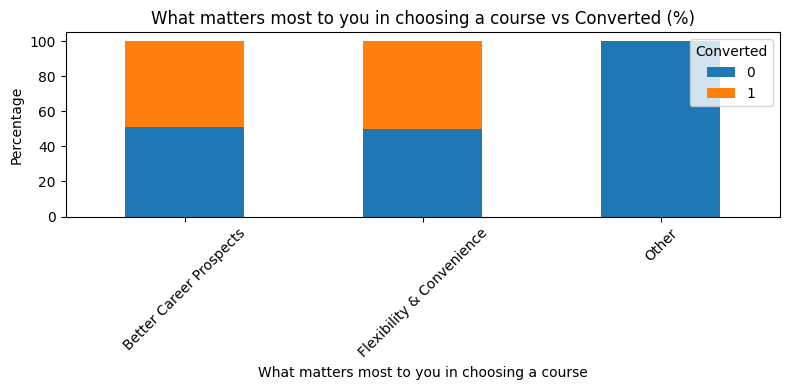

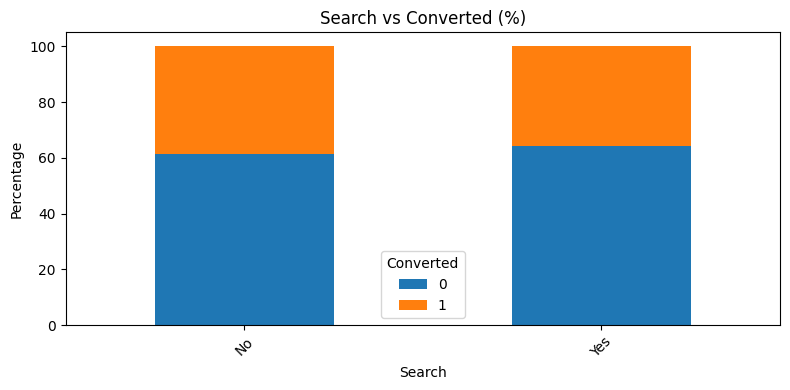

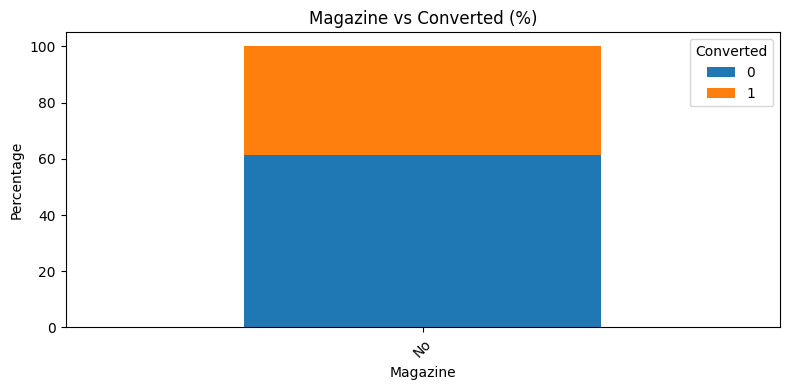

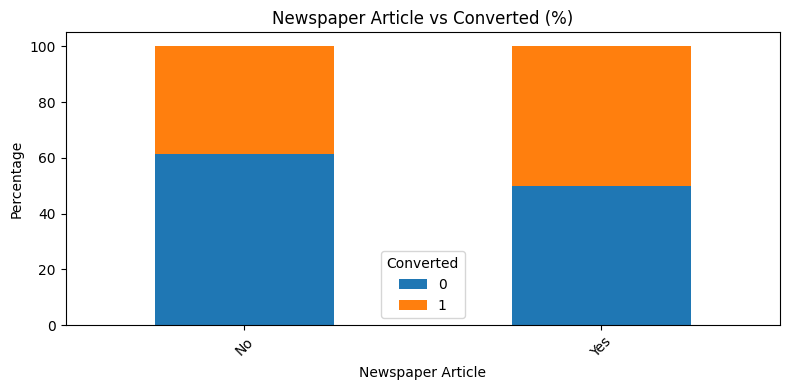

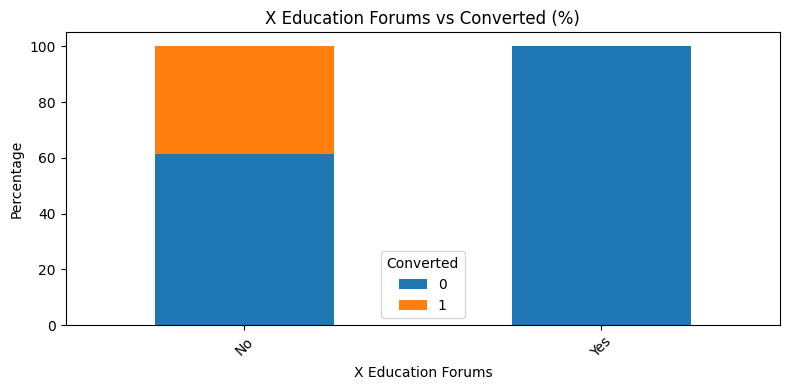

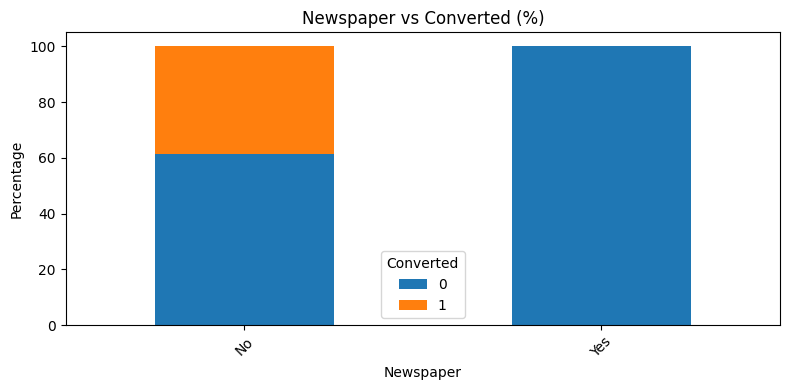

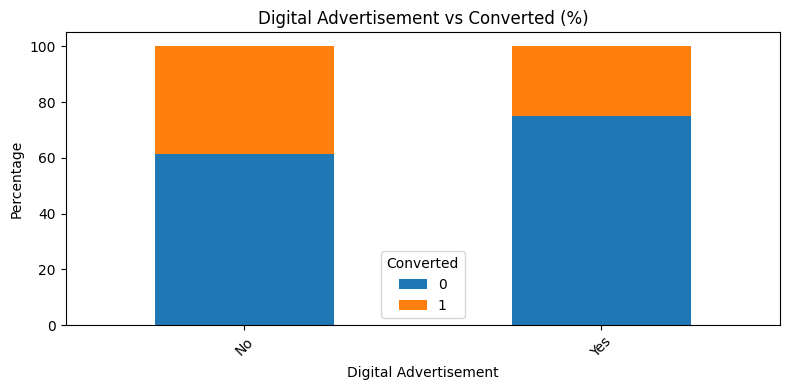

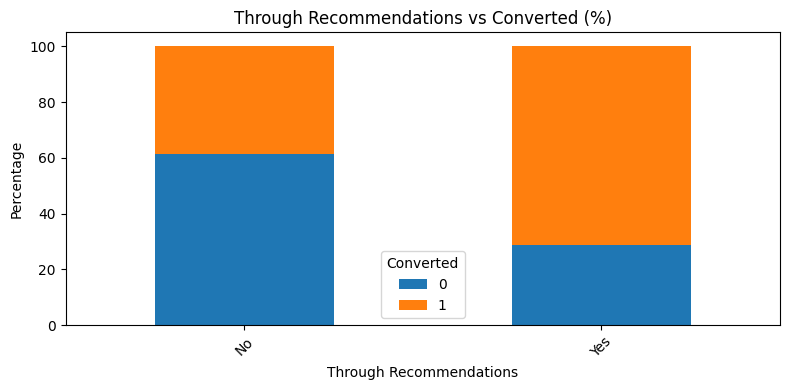

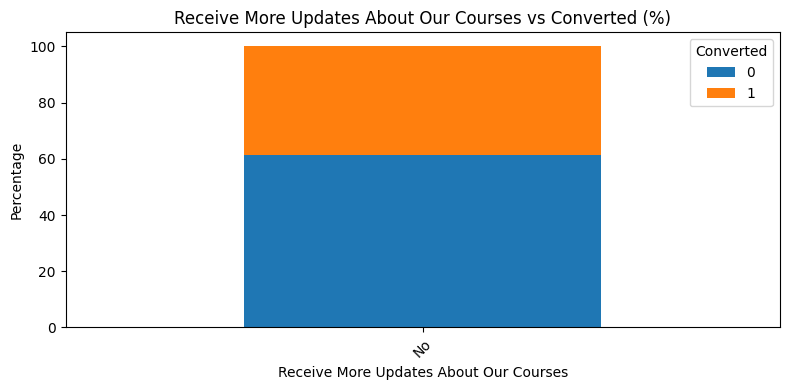

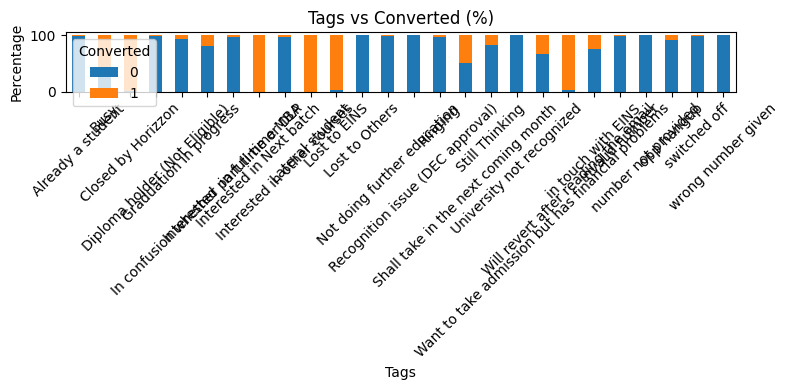

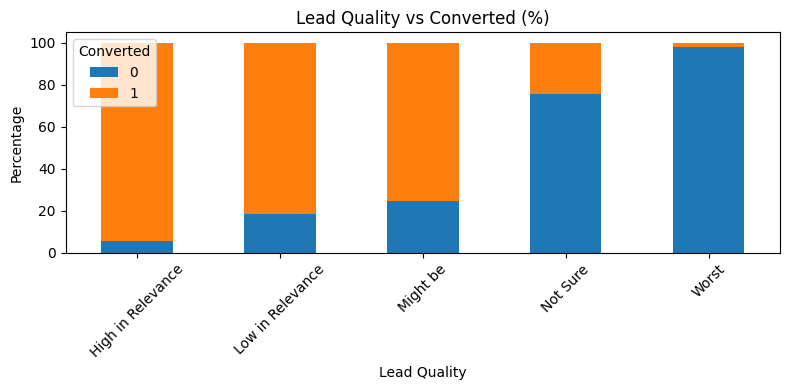

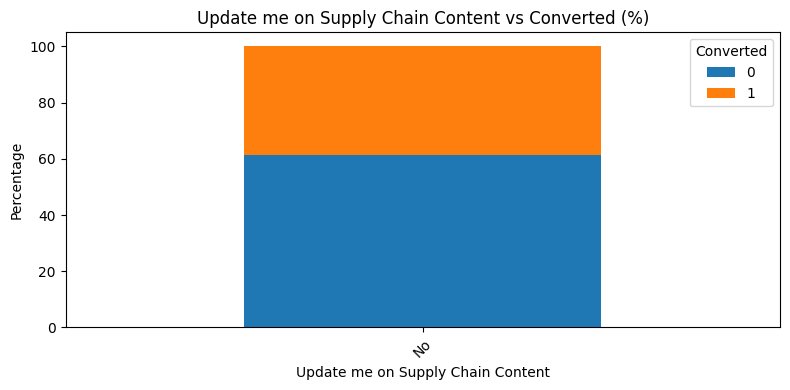

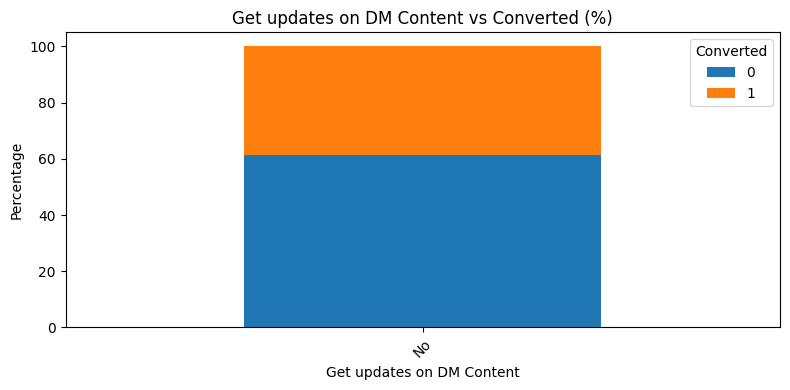

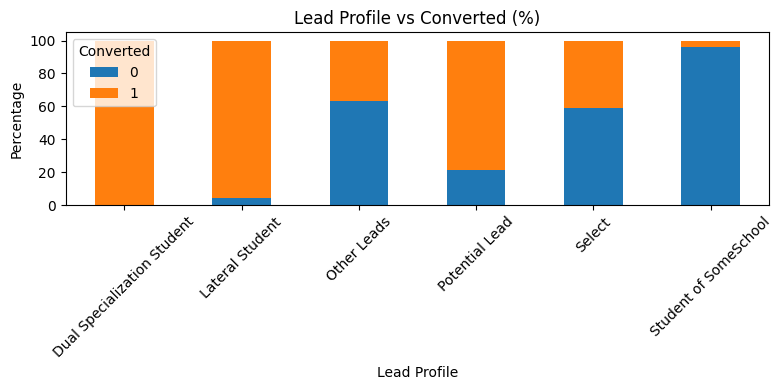

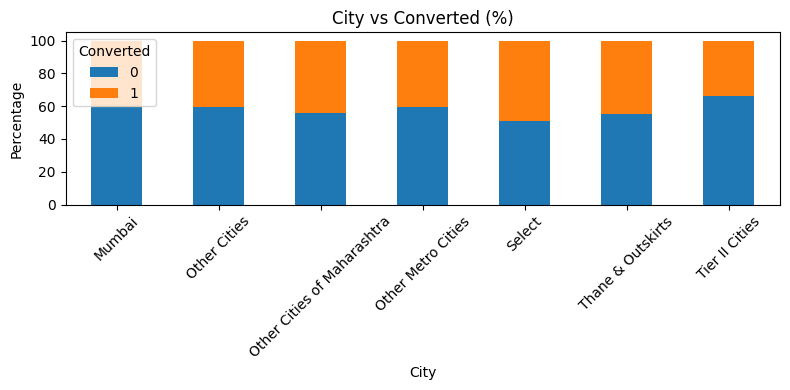

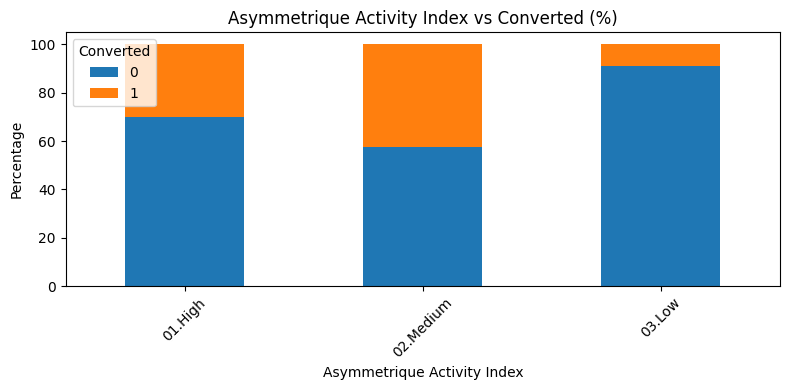

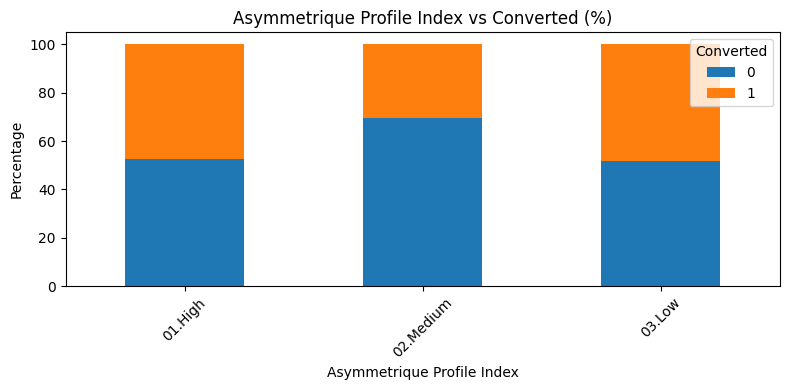

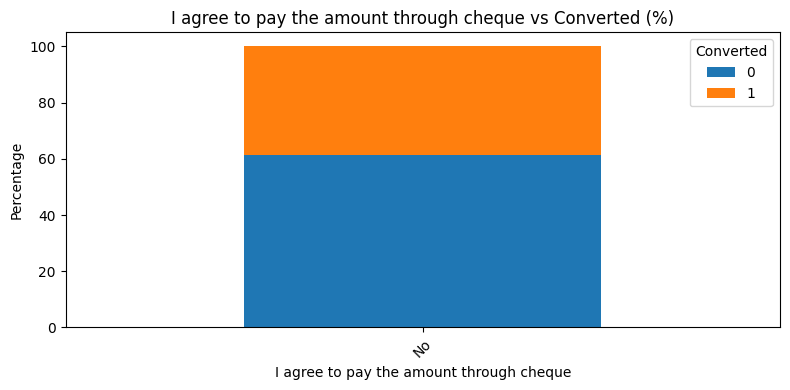

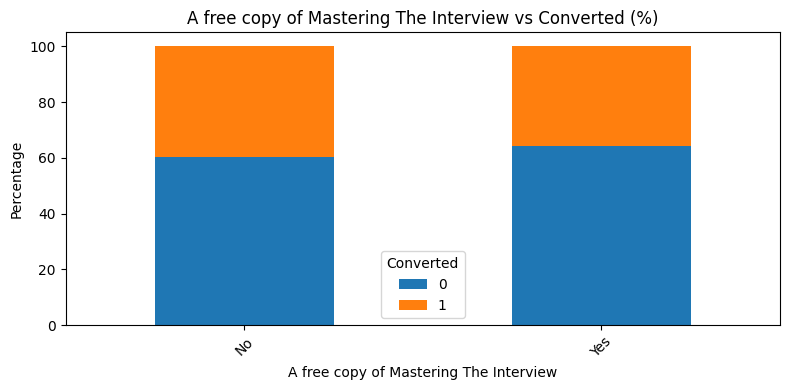

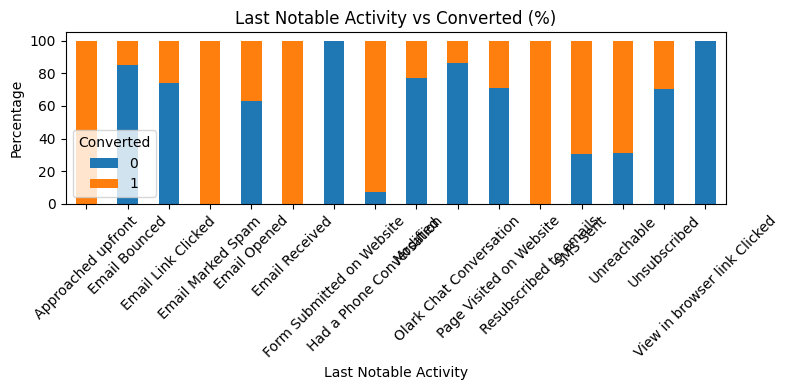

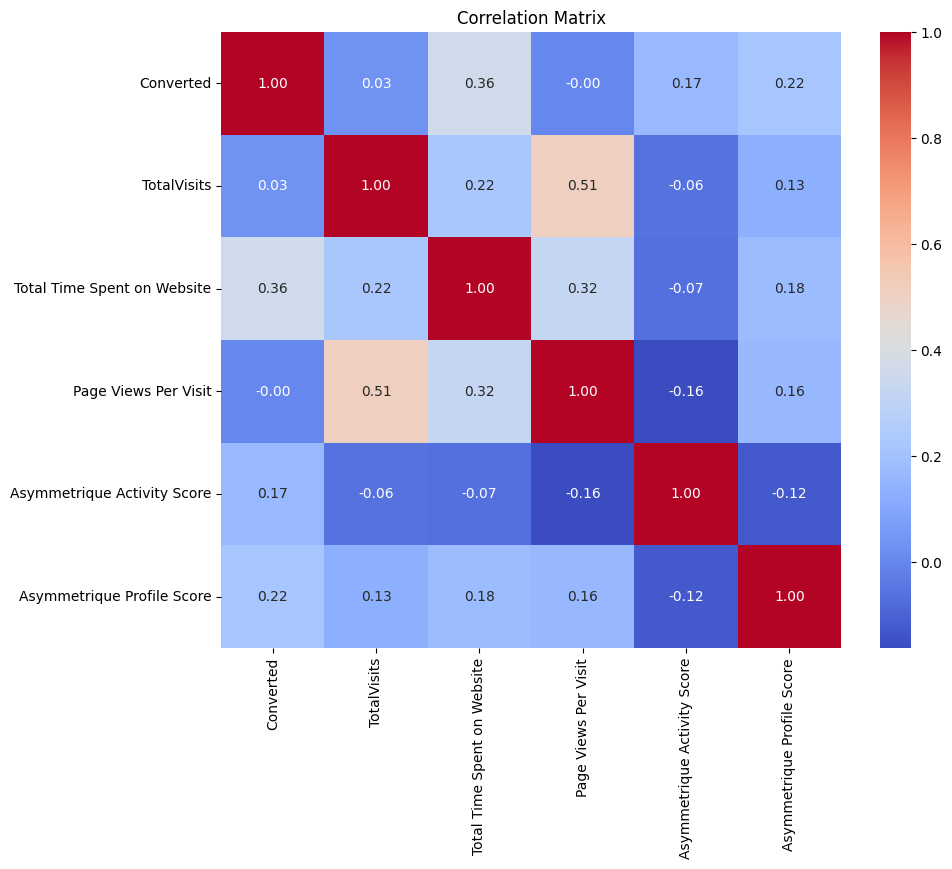

In [20]:
# -------- BIVARIATE ANALYSIS -------- #

# Example: Bivariate analysis with target column 'Converted'
target = 'Converted'  # replace if your target column has a different name

# Numerical vs Target (Boxplot)
for col in numerical_cols:
    if col != target:
        plt.figure(figsize=(6, 4))
        sns.boxplot(x=target, y=col, data=df)
        plt.title(f'{col} vs {target}')
        plt.tight_layout()
        plt.show()

# Categorical vs Target (Stacked bar chart)
for col in categorical_cols:
    ct = pd.crosstab(df[col], df[target], normalize='index') * 100
    ct.plot(kind='bar', stacked=True, figsize=(8, 4))
    plt.title(f'{col} vs {target} (%)')
    plt.ylabel("Percentage")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Correlation matrix (Numerical features only)
plt.figure(figsize=(10, 8))
corr = df[numerical_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

#### Note 
      - 1.Here Some columns are affecting the target columns So, i have decided to retain that columns
        2.I have Observed Correlation matrix for numerical features in that there is no correlation for any input variables so that i retained that numeric features

Top Features:
 Lead Quality                                     0.186834
Tags                                             0.183703
Total Time Spent on Website                      0.129946
Last Notable Activity                            0.067230
Last Activity                                    0.049711
Asymmetrique Activity Score                      0.047468
Lead Profile                                     0.044187
Lead Source                                      0.032128
Specialization                                   0.031990
Page Views Per Visit                             0.030637
TotalVisits                                      0.030622
Lead Origin                                      0.025813
What is your current occupation                  0.024874
City                                             0.021091
How did you hear about X Education               0.017396
What matters most to you in choosing a course    0.017352
Asymmetrique Profile Score                       0.015570

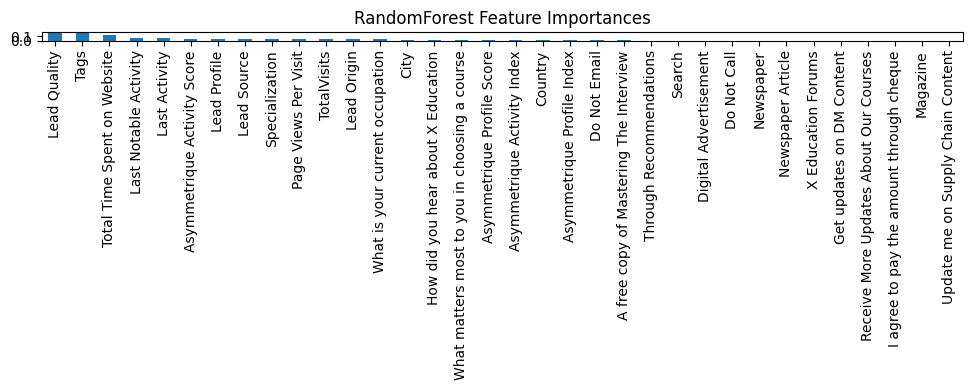

In [21]:





# Encode categorical features
df_encoded = df.copy()
le = LabelEncoder()
for col in df_encoded.select_dtypes(include='object').columns:
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))

# Split dataset
X = df_encoded.drop("Converted", axis=1)  # replace "Converted" with your target
y = df_encoded["Converted"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train RandomForest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# -------------------
# 1. Built-in Feature Importance
# -------------------
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Top Features:\n", importances)

# Plot
importances.plot(kind='bar', figsize=(10, 4), title="RandomForest Feature Importances")
plt.tight_layout()
plt.show()

# -------------------



In [ ]:
#Identifying null percentage for columns
null_percentage = df.isnull().mean() * 100

# Display all columns with their % of missing values
print(null_percentage.sort_values(ascending=False))

Lead Quality                                     51.590909
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Score                       45.649351
Asymmetrique Profile Index                       45.649351
Asymmetrique Activity Score                      45.649351
Tags                                             36.287879
Lead Profile                                     29.318182
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

In [ ]:
#Identifying unique values for lead quality column
print(df['Lead Quality'].unique())
mode_value = df['Lead Quality'].mode()[0]
print("Mode of Lead Quality:", mode_value)



['Low in Relevance' nan 'Might be' 'Not Sure' 'Worst' 'High in Relevance']
Mode of Lead Quality: Might be


#### Note
      - I had also done with AutoEDA like Glook Those reports are saved in EdaReports Folder